**Todo notes**
1. display $ F(z) = \frac{1}{ 1+z^2} $ modular surface in 3D and 2D plots
2. Draw circle of convergence, $
\displaystyle
\frac{1}{a-x}
=
\sum_{k=1}^\infty \frac{X^j}{ (a - k) ^ {j+1} }
$, iif $|X| \lt |{a-k}|$

**See also**  

*Pandas tables:*  
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

*Subplots:*  
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html  

*3D plot:*    
https://matplotlib.org/stable/gallery/mplot3d/surface3d_2.html  
https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html  
https://matplotlib.org/stable/gallery/mplot3d/stem3d_demo.html  

*Math formulas:*  
https://en.wikibooks.org/wiki/LaTeX/Mathematics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# n = 100
# t = np.linspace(-3, 3, n)
# t = t.reshape(n, 1)
# x1 = t
# x2 = t*1j
# old_err =  np.seterr(all='ignore')
# f1 = 1 / (1+x1**2)
# f2 = 1 / (1+x2**2)
# np.seterr(**old_err)
# m1 = np.abs(f1)
# m2 = np.abs(f2)

def getData(n, x0, x1):
    t = np.linspace(x0, x1, n)
    t = t.reshape(n, 1)
    x1 = t
    x2 = t*1j
    old_err =  np.seterr(all='ignore')
    f1 = 1 / (1+x1**2)
    f2 = 1 / (1+x2**2)
    np.seterr(**old_err)
    return t, f1, f2


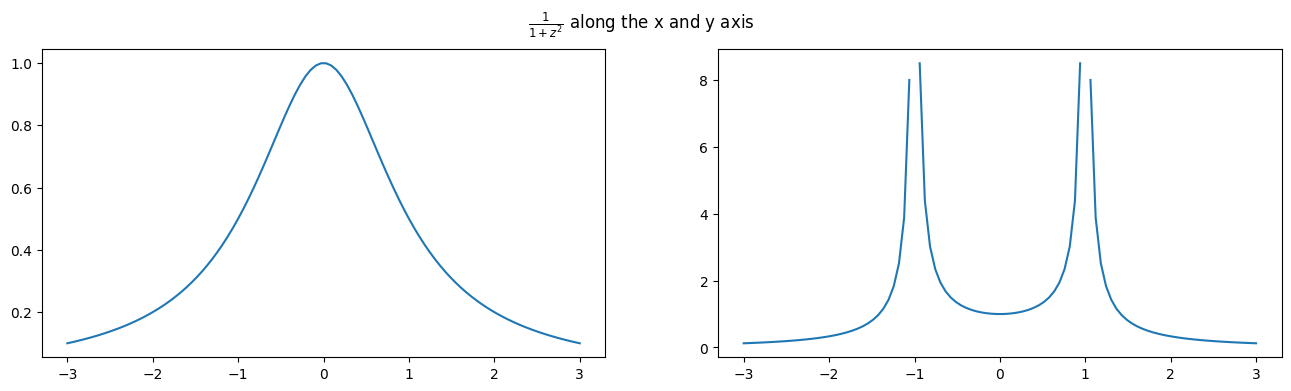

,x1,x2,f1,f2,m1,m2
0,-3.00+0.00j,-0.00-3.00j,0.10+0.00j,-0.12-0.00j,0.10+0.00j,0.12+0.00j
1,-2.94+0.00j,-0.00-2.94j,0.10+0.00j,-0.13-0.00j,0.10+0.00j,0.13+0.00j
2,-2.88+0.00j,-0.00-2.88j,0.11+0.00j,-0.14-0.00j,0.11+0.00j,0.14+0.00j
3,-2.82+0.00j,-0.00-2.82j,0.11+0.00j,-0.14-0.00j,0.11+0.00j,0.14+0.00j
4,-2.76+0.00j,-0.00-2.76j,0.12+0.00j,-0.15-0.00j,0.12+0.00j,0.15+0.00j
5,-2.70+0.00j,-0.00-2.70j,0.12+0.00j,-0.16-0.00j,0.12+0.00j,0.16+0.00j
6,-2.64+0.00j,-0.00-2.64j,0.13+0.00j,-0.17-0.00j,0.13+0.00j,0.17+0.00j
7,-2.58+0.00j,-0.00-2.58j,0.13+0.00j,-0.18-0.00j,0.13+0.00j,0.18+0.00j
8,-2.52+0.00j,-0.00-2.52j,0.14+0.00j,-0.19-0.00j,0.14+0.00j,0.19+0.00j
9,-2.45+0.00j,-0.00-2.45j,0.14+0.00j,-0.20-0.00j,0.14+0.00j,0.20+0.00j


In [11]:
def plotRealAndImaginaryCut(n=100, x0=-3, x1=3):
    t, f1, f2 = getData(n, x0, x1)
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))
    fig.suptitle(r'$\frac{1}{1+z^2}$ along the x and y axis')
    axs[0].plot(t, np.abs(f1))
    axs[1].plot(t, np.abs(f2))
    plt.show()

    m1 = np.abs(f1)
    m2 = np.abs(f2)
    arr1 = np.hstack([t, 1j*t, f1, f2, m1, m2])
    hdr = ['x1', 'x2', 'f1', 'f2', 'm1', 'm2']
    df = pd.DataFrame(arr1, columns=hdr)
    
    return df 
df = plotRealAndImaginaryCut()
df.style.format(precision=2).hide([row for row in df.index if row not in list(range(10))])

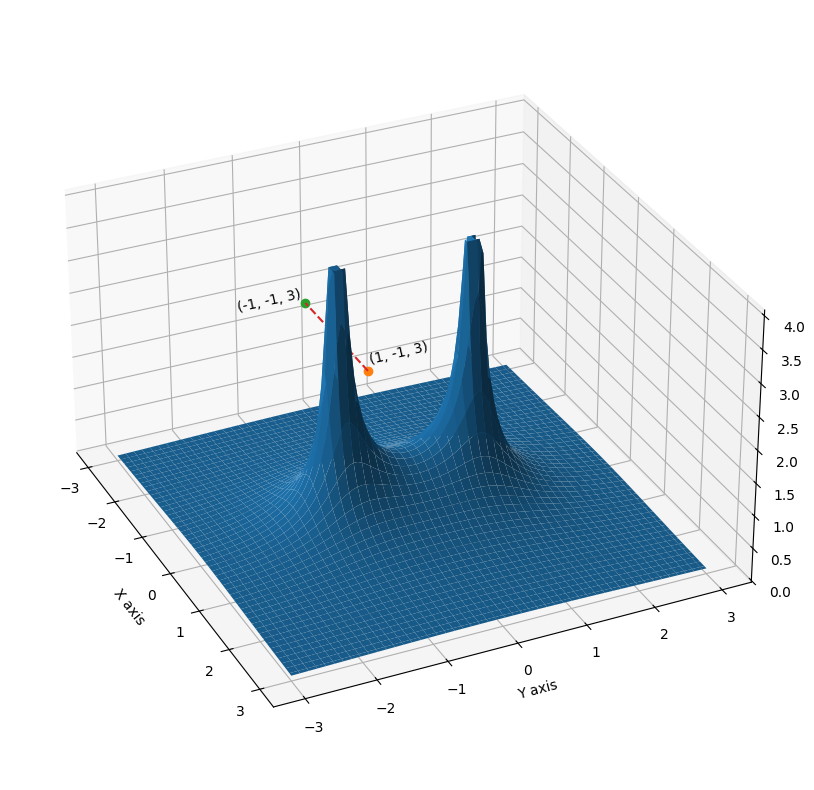

In [4]:
def plotModularSurface(n=100, x0=-3, x1=3, debug=False):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(projection='3d')
    
    t = np.linspace(x0, x1, n)
    x,y = np.meshgrid(t, t)
    
    cp = x+1j*y
    cp2 = cp**2
    z = np.minimum(np.abs(1/(1+cp2)), 4.0) 
    
    ax.plot_surface(x, y, z)
    # ax.set_zlim3d(0, 4)
    
    if debug:
        ax.plot(1, -1, 3, marker='o')
        ax.text(1, -1, 3.1, "(1, -1, 3)", 'y')
        ax.plot(-1, -1, 3, marker='o')
        ax.text(-1, -2, 3.1, "(-1, -1, 3)", 'y')
        ax.plot([1, -1 ], [-1, -1], [3, 3], linestyle='dashed' )
    
    ax.set_aspect('equal')
    ax.view_init(elev=30., azim=-25, roll=0)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    plt.show()

plotModularSurface(debug=True)

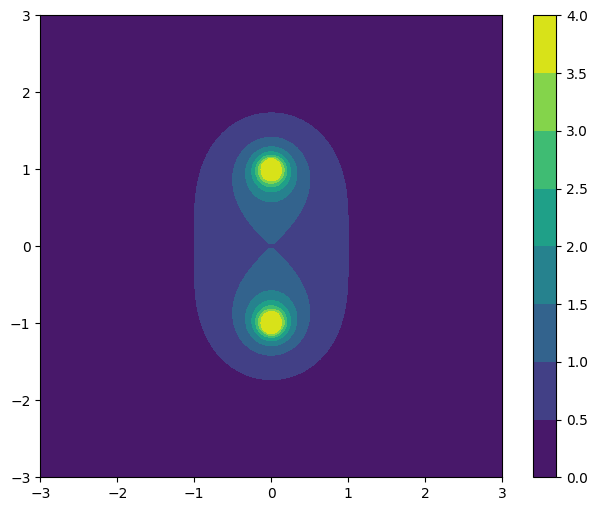

In [5]:
def plotContour(n=100, x0=-3, x1=3):
    t = np.linspace(x0, x1, n)

    x,y = np.meshgrid(t, t)
    cp = x+1j*y
    cp2 = cp**2
    z = np.minimum(np.abs(1/(1+cp2)), 4.0)

    fig = plt.figure(figsize=(8, 6))
    plt.contourf(t, t, z)
    plt.axis('scaled')
    plt.colorbar()
    plt.show()
plotContour()

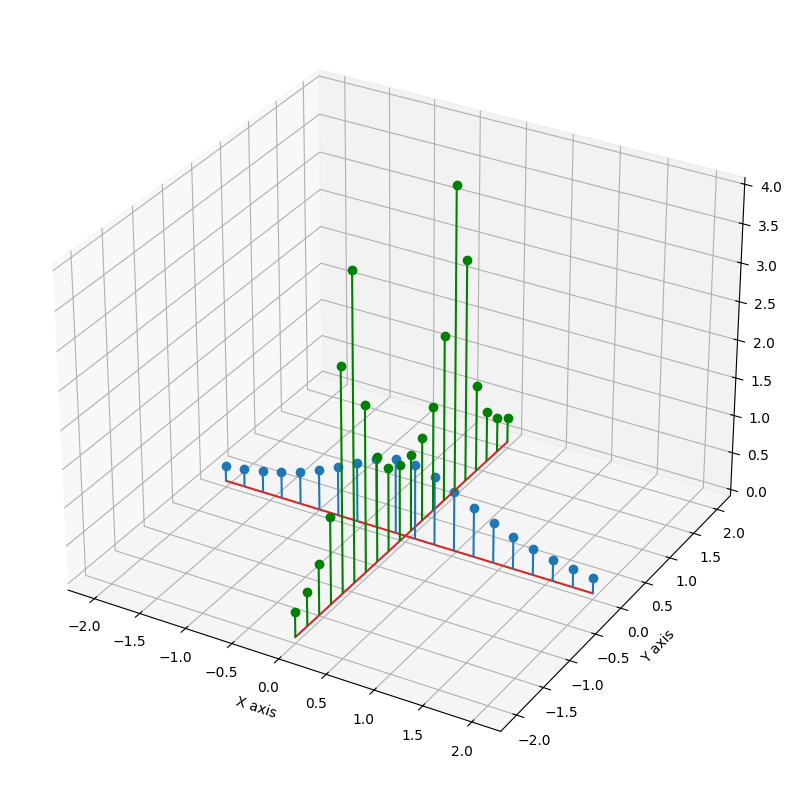

In [6]:
def plotStem():
    t = np.linspace(0, 1, 20)
    a1 = -2+t*4
    b1 = t*0
    c1 = a1+1j*b1
    f1 = np.abs(1/(1+c1**2))
    
    a2 = t*0
    b2 = -2+t*4
    c2 = a2+1j*b2
    f2 = np.minimum(np.abs(1/(1+c2**2)), 4)
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(projection='3d')
    # fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    ax.stem(a1, b1, f1)
    ax.stem(a2, b2, f2, linefmt='g', markerfmt='og')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    
    plt.show()
plotStem()